In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import os

In [2]:
df = pd.read_csv(os.path.join(os.pardir, 'data', 'store_summarize.csv'))
df['area'] = df['url'].str[29:31].astype(int)
df['closed_days'] = df['closed_days'].fillna('-').astype(str)
df.head()

,Unnamed: 0,name,score,station,tel,address,latitude,longitude,open_time,closed_days,sheets,url,icon_url,summarize_0,summarize_1,area
0,0,銀座 八五,3.90,東銀座駅,不明の為情報お待ちしております,東京都中央区銀座3-14-2 第一はなぶさビル 1F,35.670547,139.770150,11:00～ 当日の並び順でのご案内※当日分のスープがなくなり次第受付を終了いたします。12...,月曜日、火曜日（不定休）※定休日の最新情報は、twitterをご覧ください。,6席 （カウンターのみ）,https://tabelog.com/tokyo/A1301/A130101/13228602/,https://tblg.k-img.com/resize/640x640c/restaur...,1,1,1
1,1,むぎとオリーブ 銀座本店,3.78,東銀座駅,03-3571-2123,東京都中央区銀座6-12-12 銀座ステラビル 1F,35.669003,139.764360,[月・火・木・金・土・日]11:00～15:30(L.O.)17:30～21:30(L.O.),水曜日,15席 （カウンター15席）,https://tabelog.com/tokyo/A1301/A130101/13164932/,https://tblg.k-img.com/resize/640x640c/restaur...,1,0,1
2,2,麺屋ひょっとこ 交通会館店,3.78,有楽町駅,03-3211-6002,東京都千代田区有楽町2-10-1 東京交通会館 B1F,35.675160,139.764343,[月～金]11:00～20:00[土・祝]11:00～19:00,日曜日,7席 （カウンター7席）,https://tabelog.com/tokyo/A1301/A130102/13046637/,https://tblg.k-img.com/resize/640x640c/restaur...,1,0,1
3,3,銀座 朧月（おぼろづき）,3.78,銀座駅,03-6280-6166,東京都中央区銀座6-3-5 第一高橋ビル 1F,35.671578,139.761383,【月・火・水・日祝】11:00～16:00 17:00～22:00【木・金・土】11:00〜...,無休,7席 （カウンターのみ）,https://tabelog.com/tokyo/A1301/A130101/13118141/,https://tblg.k-img.com/resize/640x640c/restaur...,1,0,1
4,4,麺処 銀笹（ぎんざさ）,3.78,築地市場駅,03-3543-0280,東京都中央区銀座8-15-2 藤ビル 1F,35.666225,139.763421,[月～金]11:30～15:0017:30～22:00(スープがなくなり次第営業終了)[土]...,日曜日、祝日,18席 （４人掛けテーブル４卓、２人掛けテーブル１卓）,https://tabelog.com/tokyo/A1301/A130103/13119563/,https://tblg.k-img.com/resize/640x640c/restaur...,1,0,1


エリアの検討
* A1301 銀座・新橋・有楽町
* A1302 東京・日本橋
* A1303 渋谷・恵比寿・代官山
* A1304 新宿・代々木・大久保
* A1305 池袋～高田馬場・早稲田
* A1306 原宿・表参道・青山
* A1307 六本木・麻布・広尾
* A1308 赤坂・永田町・溜池
* A1309 四ツ谷・市ヶ谷・飯田橋
* A1310 秋葉原・神田・水道橋
* A1311 上野・浅草・日暮里
* A1312 両国・錦糸町・小岩
* A1313 築地・湾岸・お台場
* A1314 浜松町・田町・品川
* A1315 大井・蒲田
* A1316 目黒・白金・五反田
* A1317 東急沿線
* A1318 京王・小田急沿線
* A1319 中野～西荻窪
* A1320 吉祥寺・三鷹・武蔵境
* A1321 西武沿線
* A1322 板橋・東武沿線
* A1323 大塚・巣鴨・駒込・赤羽
* A1324 千住・綾瀬・葛飾
* A1325 小金井・国分寺・国立
* A1326 調布・府中・狛江
* A1327 町田・稲城・多摩
* A1328 西東京市周辺
* A1329 立川市・八王子市周辺
* A1330 福生・青梅周辺
* A1331 伊豆諸島・小笠原

In [3]:
print(df.shape)
#df2 = df[(df['score'] != '-') &
#         (df['area'] < 30) &
#         (~df['closed_days'].str.contains('日曜')) &
#         (~df['closed_days'].str.contains('日・祝'))]
df2 = df[(df['score'] != '-') &
         (df['area'] < 30)]
print(df2.shape)

(1222, 16)
(1160, 16)


<AxesSubplot: >

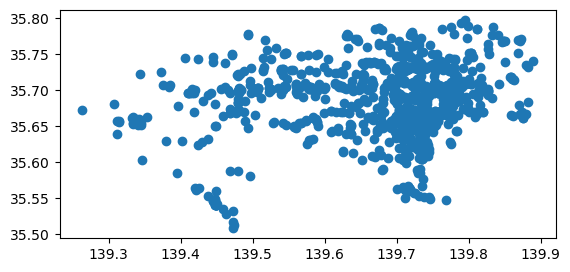

In [4]:
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.longitude, df2.latitude))
gdf.plot()

In [5]:
gdf.to_file(os.path.join(os.pardir, 'data', 'store_all.geojson'), driver='GeoJSON')

<AxesSubplot: >

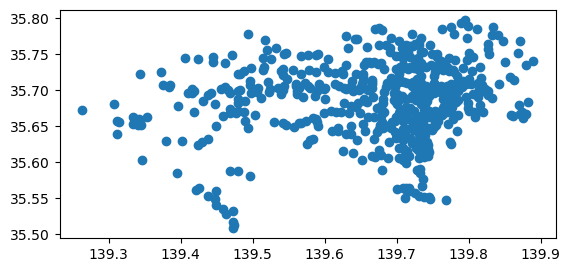

In [6]:
df2 = df2[df2['summarize_0'] == 1]
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.longitude, df2.latitude))
gdf.plot()

In [7]:
gdf.to_file(os.path.join(os.pardir, 'data', 'store_summarize.geojson'), driver='GeoJSON')